In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [94]:
data_test =pd.read_csv('DailyDelhiClimateTest.csv', index_col='date')
data_train =pd.read_csv('DailyDelhiClimateTrain.csv', index_col='date')


In [95]:
data_train.head()
data_test.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [96]:
data_train.shape

(1462, 4)

In [97]:
data_test.shape

(114, 4)

In [98]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      114 non-null    float64
 1   humidity      114 non-null    float64
 2   wind_speed    114 non-null    float64
 3   meanpressure  114 non-null    float64
dtypes: float64(4)
memory usage: 4.5+ KB


In [99]:
data_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [100]:
data_test.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


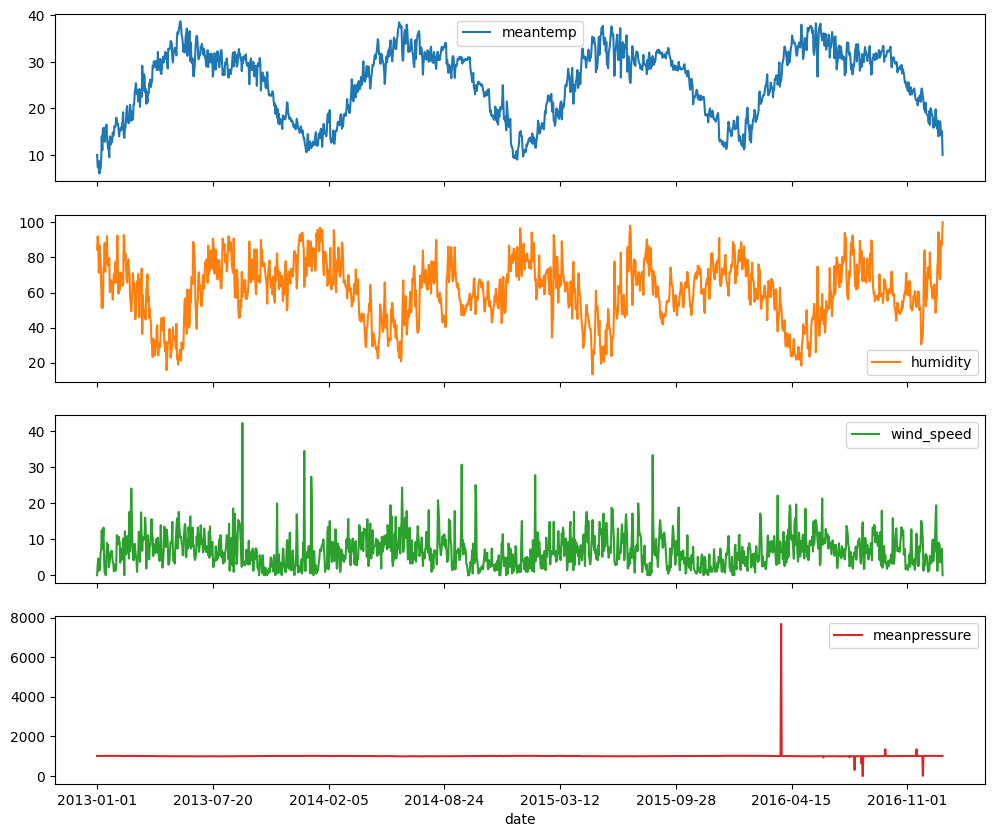

In [101]:
data_train.plot(subplots=True, figsize=(12,10))
plt.show()

In [102]:
missing_values_per_column = data_train.isna().sum()
print(missing_values_per_column)

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [103]:
for col in data_train.columns:
    data_train[f"{col}_lag1"] = data_train[col].shift(1)
    data_train[f"{col}_rolling_mean7"] = data_train[col].rolling(window=7).mean()
    
data_train.dropna(inplace=True)
data_train.head()

,meantemp,humidity,wind_speed,meanpressure,meantemp_lag1,meantemp_rolling_mean7,humidity_lag1,humidity_rolling_mean7,wind_speed_lag1,wind_speed_rolling_mean7,meanpressure_lag1,meanpressure_rolling_mean7
date,,,,,,,,,,,,
2013-01-07,7.000000,78.600000,6.300000,1020.000000,7.000000,7.604762,82.800000,83.295238,1.480000,2.903810,1018.000000,1017.685714
2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.000000,7.441497,78.600000,80.325850,6.300000,3.924218,1020.000000,1018.121088
2013-01-09,14.000000,51.250000,12.500000,1017.000000,8.857143,8.384354,63.714286,74.504422,7.142857,5.284218,1018.714286,1018.006803
2013-01-10,11.000000,62.000000,7.400000,1015.666667,14.000000,8.931973,51.250000,70.932993,12.500000,5.679456,1017.000000,1017.578231
2013-01-11,15.714286,51.285714,10.571429,1016.142857,11.000000,9.938776,62.000000,68.069048,7.400000,7.013469,1015.666667,1017.431973


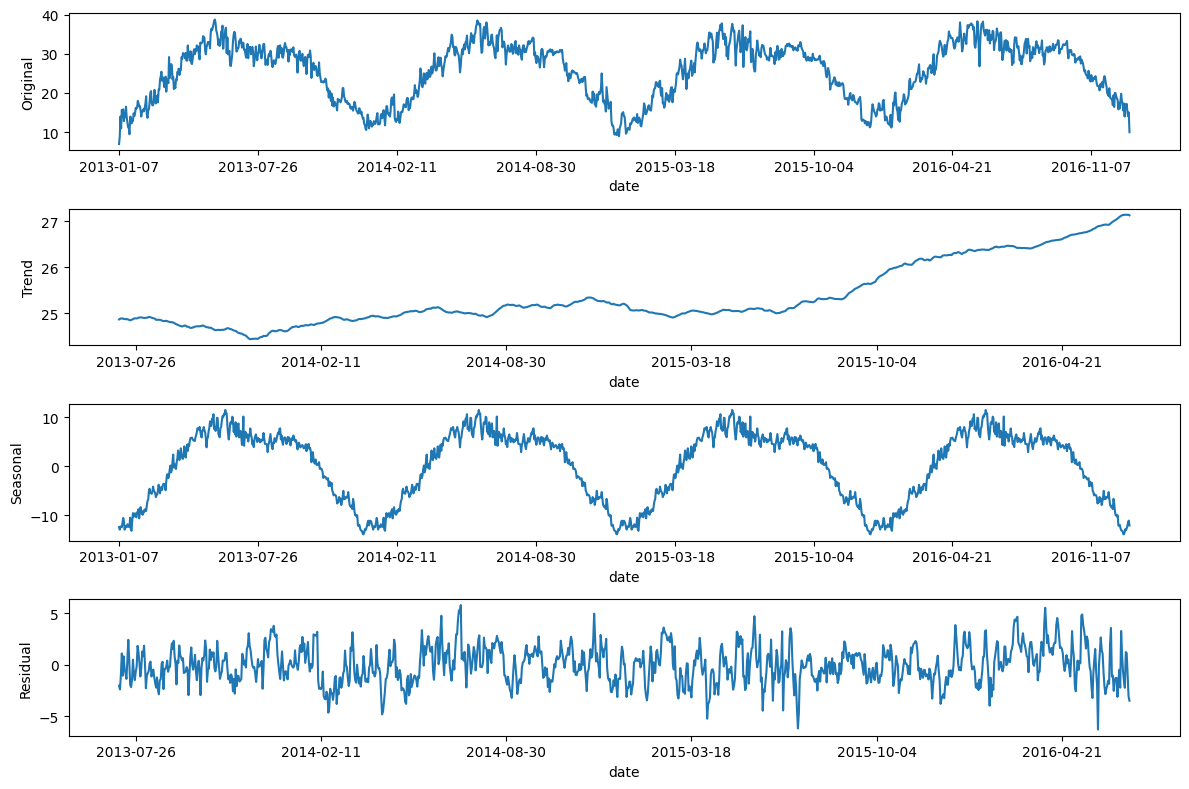

In [104]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

column_to_analyze = 'meantemp'
result = seasonal_decompose(data_train[column_to_analyze], model='additive', period=365)

# Plotting
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 8))

result.observed.plot(ax=ax1)
ax1.set(ylabel='Original')

result.trend.plot(ax=ax2)
ax2.set(ylabel='Trend')

result.seasonal.plot(ax=ax3)
ax3.set(ylabel='Seasonal')

result.resid.plot(ax=ax4)
ax4.set(ylabel='Residual')

plt.tight_layout()
plt.show()


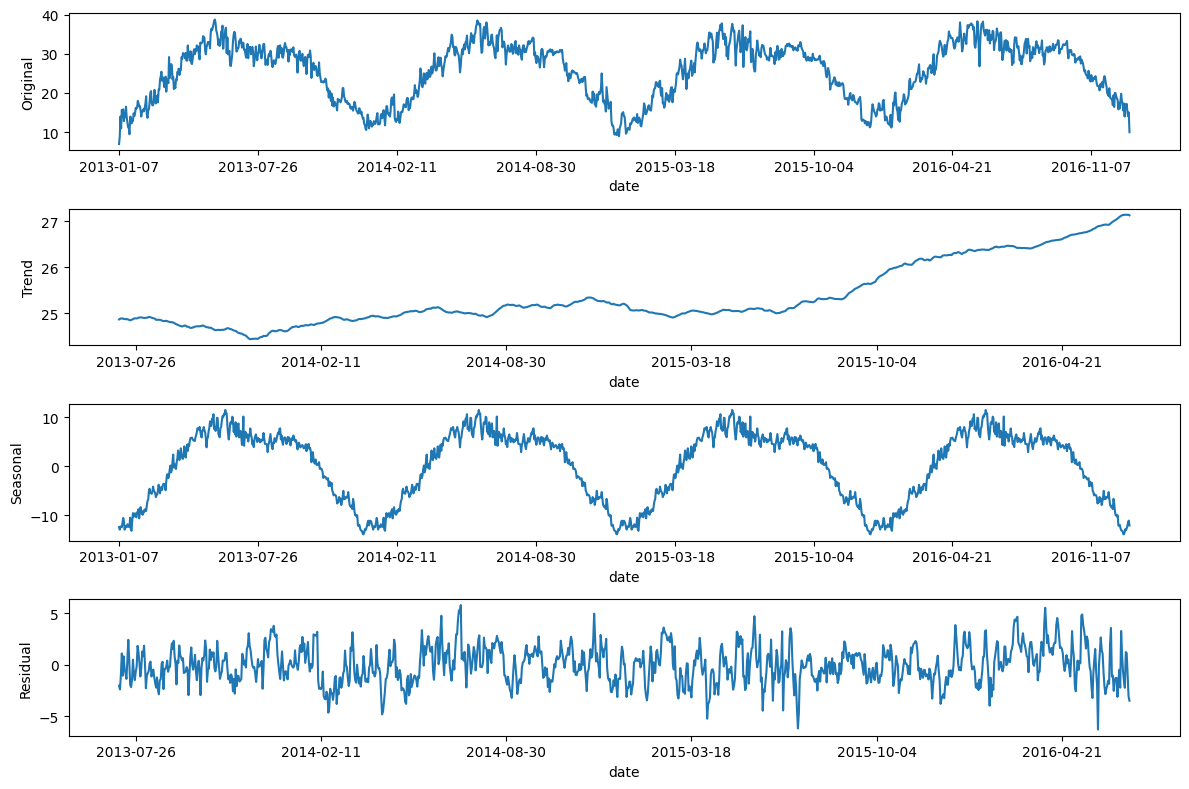

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose

column_to_analyze = 'humidity'
resulth = seasonal_decompose(data_train[column_to_analyze], model='additive', period=365)

# Plotting
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 8))

result.observed.plot(ax=ax1)
ax1.set(ylabel='Original')

result.trend.plot(ax=ax2)
ax2.set(ylabel='Trend')

result.seasonal.plot(ax=ax3)
ax3.set(ylabel='Seasonal')

result.resid.plot(ax=ax4)
ax4.set(ylabel='Residual')

plt.tight_layout()
plt.show()

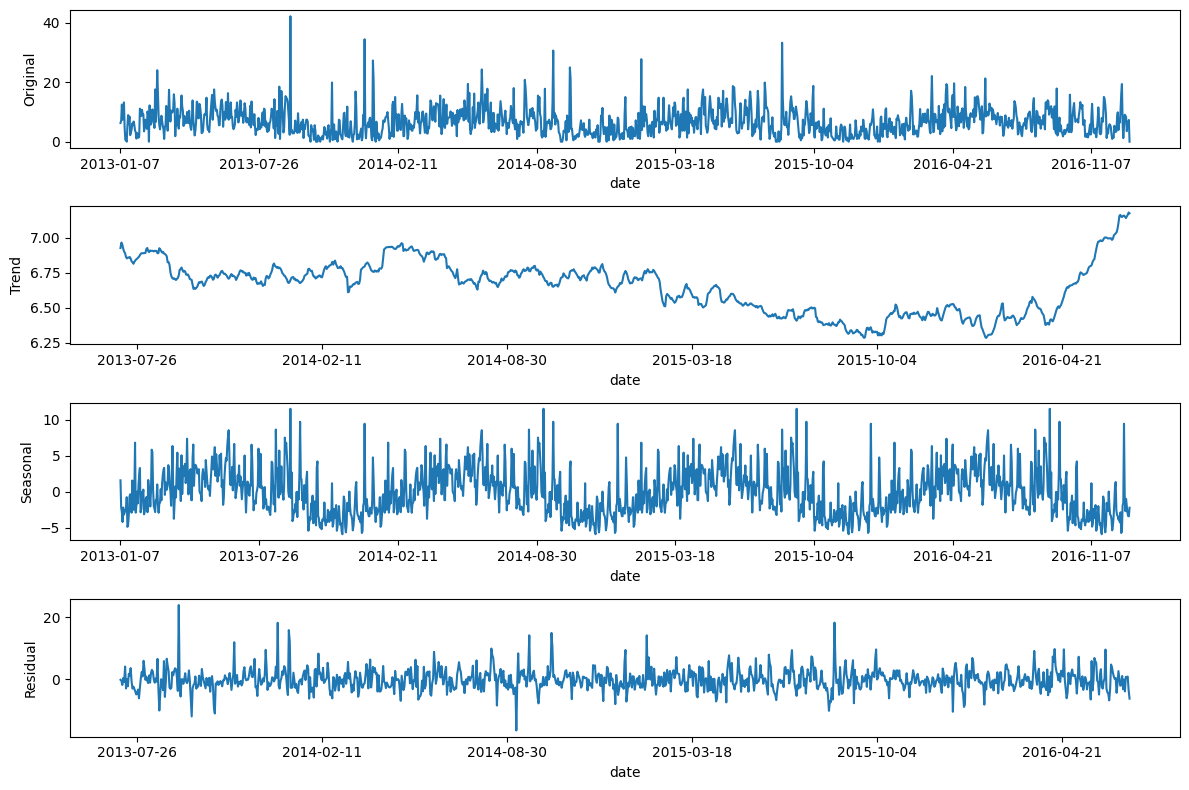

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

column_to_analyze = 'wind_speed'
result = seasonal_decompose(data_train[column_to_analyze], model='additive', period=365)

# PlottingS
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 8))

result.observed.plot(ax=ax1)
ax1.set(ylabel='Original')

result.trend.plot(ax=ax2)
ax2.set(ylabel='Trend')

result.seasonal.plot(ax=ax3)
ax3.set(ylabel='Seasonal')

result.resid.plot(ax=ax4)
ax4.set(ylabel='Residual')

plt.tight_layout()
plt.show()

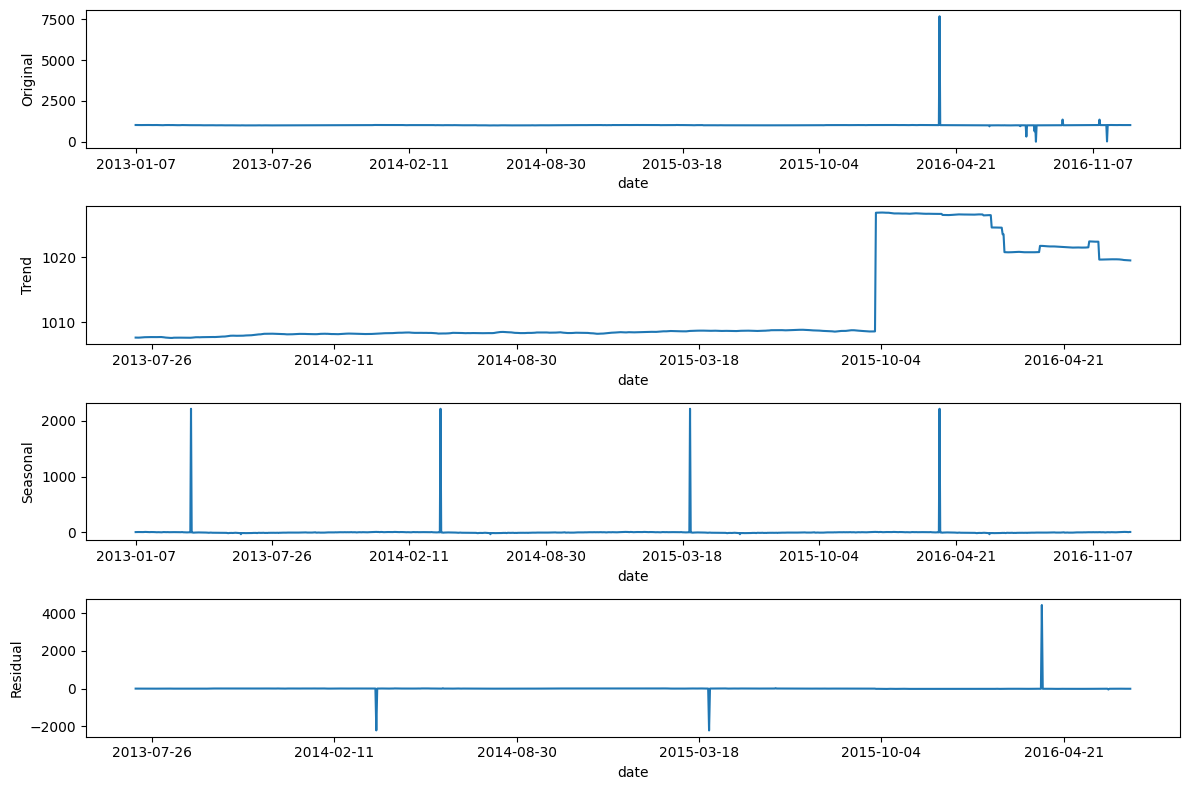

In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose

column_to_analyze = 'meanpressure'
result = seasonal_decompose(data_train[column_to_analyze], model='additive', period=365)

# Plotting
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 8))

result.observed.plot(ax=ax1)
ax1.set(ylabel='Original')

result.trend.plot(ax=ax2)
ax2.set(ylabel='Trend')

result.seasonal.plot(ax=ax3)
ax3.set(ylabel='Seasonal')

result.resid.plot(ax=ax4)
ax4.set(ylabel='Residual')

plt.tight_layout()
plt.show()

# Vérification de la stationnarité


In [108]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_train['meantemp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.8611536013722327
p-value: 0.3505504246454813


In [109]:
data_train_diff = data_train['meantemp'].diff().dropna()
result = adfuller(data_train_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -16.36449127324184
p-value: 2.8494774519209326e-29


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


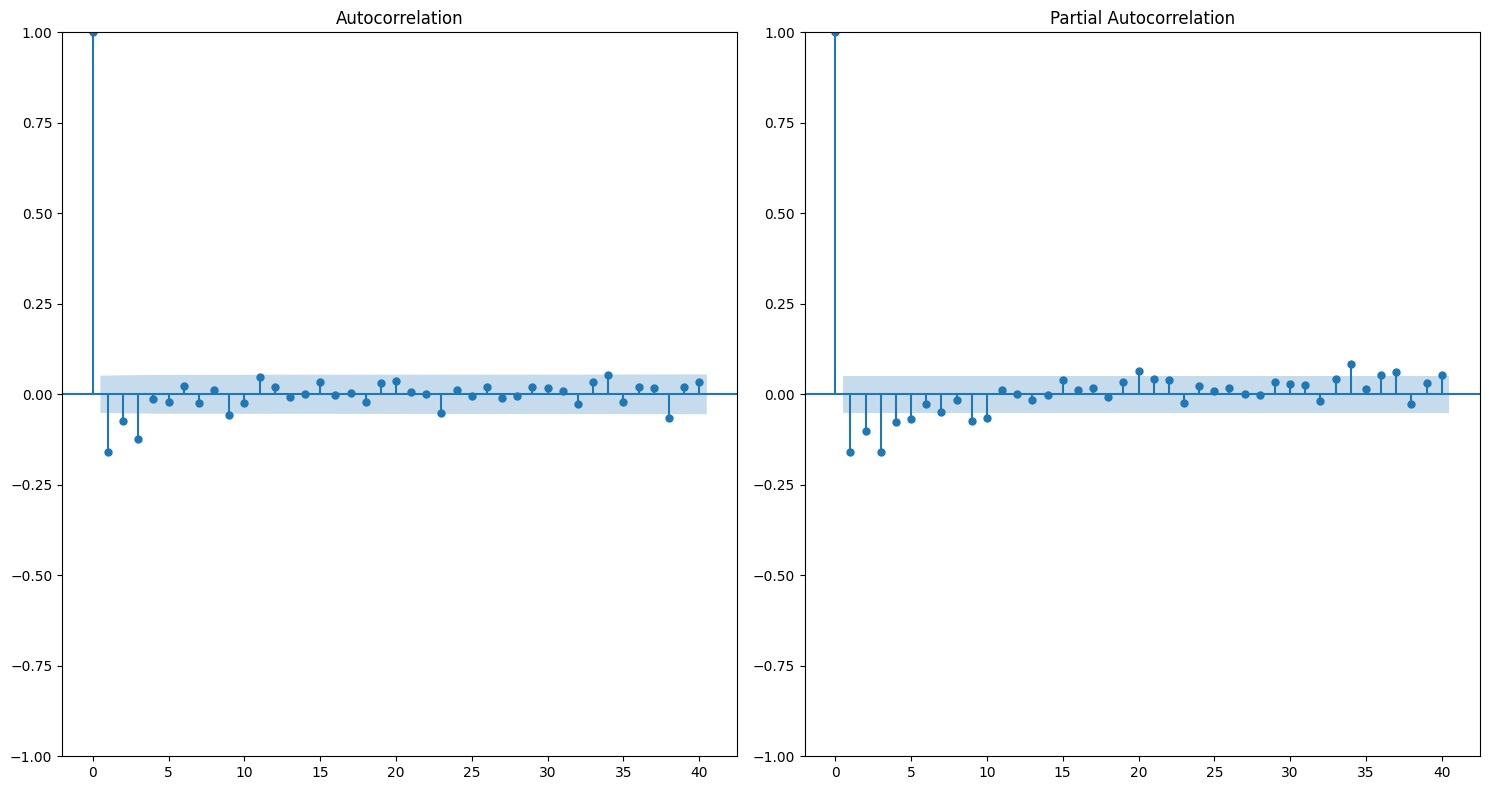

In [110]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 8))

plt.subplot(121)
plot_acf(data_train_diff, ax=plt.gca(), lags=40)
plt.subplot(122)
plot_pacf(data_train_diff, ax=plt.gca(), lags=40)

plt.tight_layout()


In [111]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_train['meantemp'], order=(1, 1, 1))
results = model.fit()

# Afficher le résumé du modèle
print(results.summary())

# Pour faire des prédictions
predictions = results.forecast(steps=114)
print(predictions)


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1456
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2756.658
Date:                Tue, 31 Oct 2023   AIC                           5519.315
Time:                        20:01:18   BIC                           5535.164
Sample:                    01-07-2013   HQIC                          5525.229
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5712      0.046     12.417      0.000       0.481       0.661
ma.L1         -0.8028      0.036    -22.003      0.000      -0.874      -0.731
sigma2         2.5888      0.072     36.007      0.0

RMSE: 10.640946660230531
MAE: 8.678559687006748


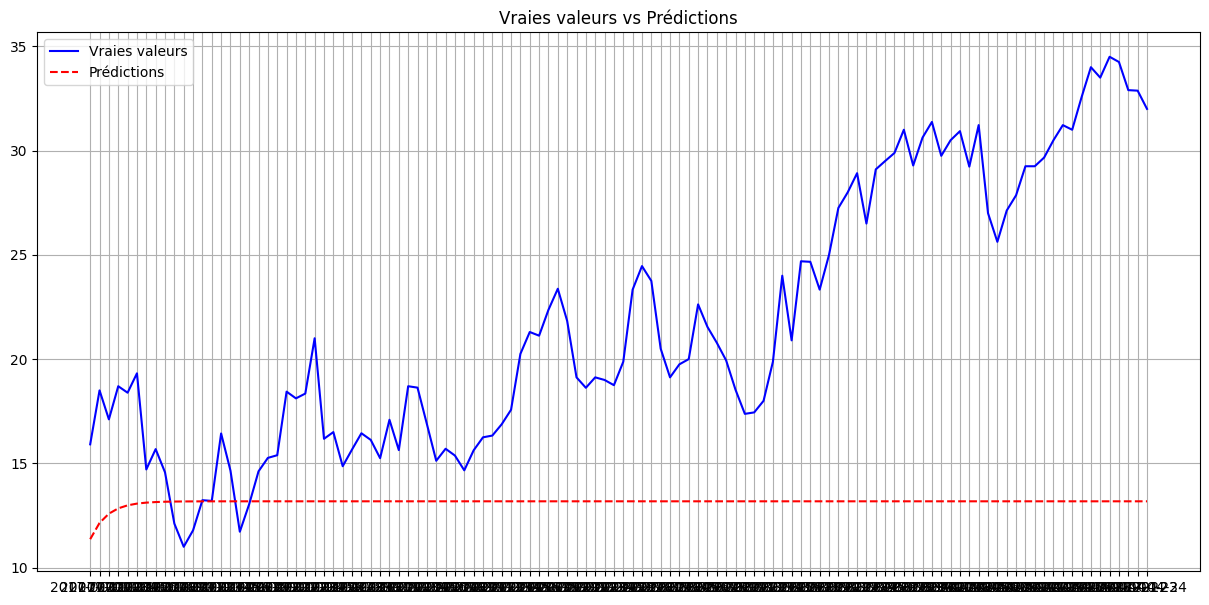

In [116]:
# RMSE
rmse = np.sqrt(mean_squared_error(data_test['meantemp'], predictions))
print(f"RMSE: {rmse}")

# MAE
mae = mean_absolute_error(data_test['meantemp'], predictions)
print(f"MAE: {mae}")


# Graphe de suivi
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(data_test['meantemp'].index, data_test['meantemp'].values, label="Vraies valeurs", color='blue')
plt.plot(data_test['meantemp'].index, predictions, label="Prédictions", color='red', linestyle='--')
plt.title("Vraies valeurs vs Prédictions")
plt.legend()
plt.grid(True)
plt.show()

